In [5]:
import numpy as np
from skimage import filters
import matplotlib.pyplot as plt

In [6]:
def squares(effect_size=50., image_size=100, moving_effect=True):
    stdbckg = 50.  #std deviation of the background
    stdkernel = 2.5  #std deviation of the Gaussian smoothing kernel
    block1size = 10  #size of the first block
    block2size = 10  #size of the 2nd block
    
    offset = int((image_size / 3.5) + 0.5)
    block2offset_ = np.asarray([offset, offset])
    block3size = 10  #size of the 3rd block
    block3offset_ = np.asarray([-offset, -offset])
    norm_percentile = 0
    half_imsize = np.int(image_size / 2)
    I = np.zeros([image_size, image_size])
    I[half_imsize - block1size : half_imsize + block1size, half_imsize - block1size : half_imsize + block1size] = effect_size

    if moving_effect:
        block2offset = block2offset_ + np.random.randint(-5, 5, size=2)
    else:
        block2offset = block2offset_

    I[half_imsize + block2offset[0] - block2size : half_imsize + block2offset[0] + block2size,\
     half_imsize + block2offset[1] - block2size : half_imsize + block2offset[1] + block2size] = effect_size

    noise = np.random.normal(scale=stdbckg, size=np.asarray([image_size, image_size]))
    smnoise = filters.gaussian(noise, stdkernel)
    smnoise = smnoise / np.std(smnoise) * stdbckg
    J = I + smnoise
    
    return J

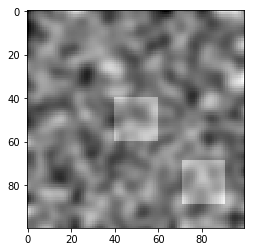

In [7]:
im = squares(100)
plt.imshow(im, cmap='gray')
plt.show()

In [8]:
def disks(effect_size=50., image_size=100, moving_effect=True, big_rad=15, small_rad=9,
          big=[True, True, True, True]):
    stdbckg = 50.  #std deviation of the background
    stdkernel = 2.5  #std deviation of the Gaussian smoothing kernel
    
    I = np.zeros([image_size, image_size])
    
    def draw_disk(center, radius):
        i_pos = range(center[0] - radius - 1, center[0] + radius + 1)
        j_pos = range(center[1] - radius - 1, center[1] + radius + 1)
        
        for i in i_pos:
            for j in j_pos:
                # check if inside circle
                if (i - center[0]) ** 2 + (j - center[1]) ** 2 <= radius ** 2:
                    I[i, j] = effect_size
    
    # Compute disk centers
    offset = 10
    # Large disks
    c1 = (offset + big_rad, offset + big_rad)
    c2 = (offset + big_rad, image_size - offset - big_rad)
    # Small disks
    c3 = (image_size - offset - big_rad, offset + big_rad)
    c4 = (image_size - offset - big_rad, image_size - offset - big_rad)
    
    centers = [c1, c2, c3, c4]
    for b, c in zip(big, centers):
        if b:
            draw_disk(c, big_rad)
        else:
            draw_disk(c, small_rad)
    
    noise = np.random.normal(scale=stdbckg, size=np.asarray([image_size, image_size]))
    smnoise = filters.gaussian(noise, stdkernel)
    smnoise = smnoise / np.std(smnoise) * stdbckg
    J = I + smnoise
    
    return J

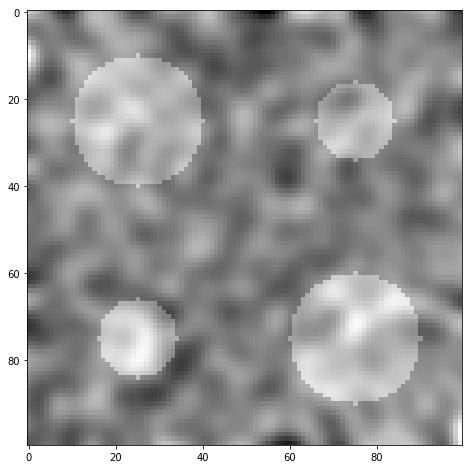

In [10]:
im = disks(effect_size=100, image_size=100, big=[True, False, False, True])
plt.figure(figsize=(8,8))
plt.imshow(im, cmap='gray')
plt.show()

In [61]:
def disks(effect_size=50., image_size=100, moving_effect=True, big_rad=15, small_rad=9):
    stdbckg = 50.  #std deviation of the background
    stdkernel = 2.5  #std deviation of the Gaussian smoothing kernel
    
    I = np.zeros([image_size, image_size])
    
    def draw_disk(center, radius):
        i_pos = range(center[0] - radius - 1, center[0] + radius + 1)
        j_pos = range(center[1] - radius - 1, center[1] + radius + 1)
        
        for i in i_pos:
            for j in j_pos:
                # check if inside circle
                if (i - center[0]) ** 2 + (j - center[1]) ** 2 <= radius ** 2:
                    I[i, j] = effect_size
    
    # Compute disk centers
    offset = 10
    # Large disks
    c1 = (offset + big_rad, offset + big_rad)
    c2 = (offset + big_rad, image_size - offset - big_rad)
    # Small disks
    c3 = (image_size - offset - big_rad, offset + big_rad)
    c4 = (image_size - offset - big_rad, image_size - offset - big_rad)
    
    draw_disk(c1, big_rad)
    draw_disk(c2, big_rad)
    
    draw_disk(c3, big_rad)
    draw_disk(c4, big_rad)
    
    noise = np.random.normal(scale=stdbckg, size=np.asarray([image_size, image_size]))
    smnoise = filters.gaussian(noise, stdkernel)
    smnoise = smnoise / np.std(smnoise) * stdbckg
    J = I + smnoise
    
    return J

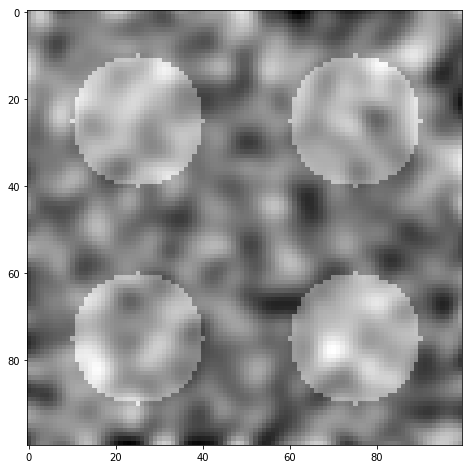

In [62]:
im = disks(effect_size=100, image_size=100)
plt.figure(figsize=(8,8))
plt.imshow(im, cmap='gray')
plt.show()

In [76]:
import h5py

In [77]:
f = h5py.File('../data/4disks_n_100_effect_100/samples.hdf5')

In [78]:
f["images"].shape

(100, 112, 112)

In [79]:
images = f["images"][:]

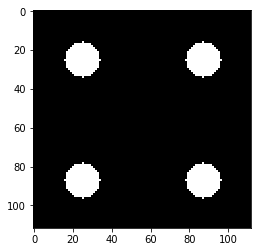

In [88]:
plt.imshow(f["gts"][0], cmap='gray')

In [87]:
f["labels"][50]

1

In [35]:
def tzero_not_fixed_delta_fixed(effect_size=100, delta=5, big_rads=[10, 12, 15, 17, 20]):
    n = len(big_rads)
    idx = np.random.randint(0, n)
    print(idx)
    big_rad = big_rads[idx]
    small_rad = big_rad - delta
    
    return disks(effect_size=effect_size, small_rad=small_rad, big_rad=big_rad, big=[True, True, False, False])

1


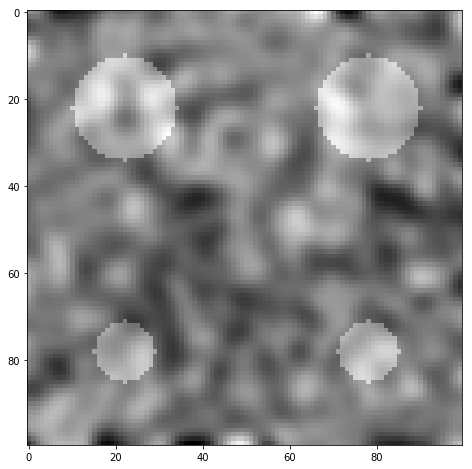

In [36]:
im = tzero_not_fixed_delta_fixed()
plt.figure(figsize=(8,8))
plt.imshow(im, cmap='gray')
plt.show()

In [37]:
def tzero_not_fixed_delta_not_fixed(effect_size=100, deltas=[0, 3, 6, 8], big_rads=[10, 12, 15, 17, 20]):
    n = len(big_rads)
    idx = np.random.randint(0, n)
    print(idx)
    big_rad = big_rads[idx]
    
    idx = np.random.randint(0, len(deltas))
    small_rad = big_rad - deltas[idx]
    
    return disks(effect_size=effect_size, small_rad=small_rad, big_rad=big_rad, big=[True, True, False, False])

0


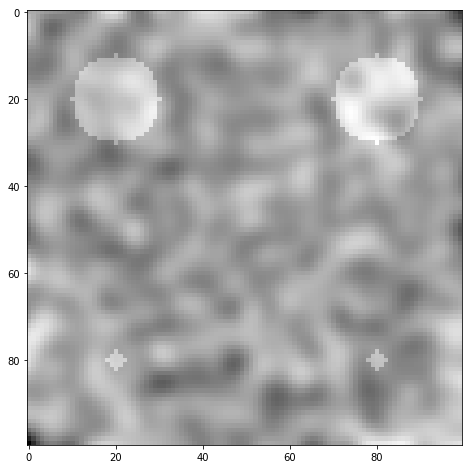

In [46]:
im = tzero_not_fixed_delta_not_fixed()
plt.figure(figsize=(8,8))
plt.imshow(im, cmap='gray')
plt.show()